# Partie 1

importing data


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi',
'pedigree', 'age', 'label']
diabetes_data= pd.read_csv("diabetes.csv", header=None, names=col_names)

data pre-treatment


In [ ]:
print(diabetes_data)
diabetes_data[col_names] = diabetes_data[col_names].apply(pd.to_numeric, errors='coerce')
print(diabetes_data)
diabetes_data.describe()

     pregnant  glucose    bp  skin  insulin   bmi  pedigree   age  label
0         NaN      NaN   NaN   NaN      NaN   NaN       NaN   NaN    NaN
1         6.0    148.0  72.0  35.0      0.0  33.6     0.627  50.0    1.0
2         1.0     85.0  66.0  29.0      0.0  26.6     0.351  31.0    0.0
3         8.0    183.0  64.0   0.0      0.0  23.3     0.672  32.0    1.0
4         1.0     89.0  66.0  23.0     94.0  28.1     0.167  21.0    0.0
..        ...      ...   ...   ...      ...   ...       ...   ...    ...
764      10.0    101.0  76.0  48.0    180.0  32.9     0.171  63.0    0.0
765       2.0    122.0  70.0  27.0      0.0  36.8     0.340  27.0    0.0
766       5.0    121.0  72.0  23.0    112.0  26.2     0.245  30.0    0.0
767       1.0    126.0  60.0   0.0      0.0  30.1     0.349  47.0    1.0
768       1.0     93.0  70.0  31.0      0.0  30.4     0.315  23.0    0.0

[769 rows x 9 columns]
     pregnant  glucose    bp  skin  insulin   bmi  pedigree   age  label
0         NaN      NaN   Na

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Missed values

In [ ]:
#Matrix for missed values
print(diabetes_data.isnull());
#Removing rows having missed values
diabetes_data.dropna(inplace=True)
diabetes_data


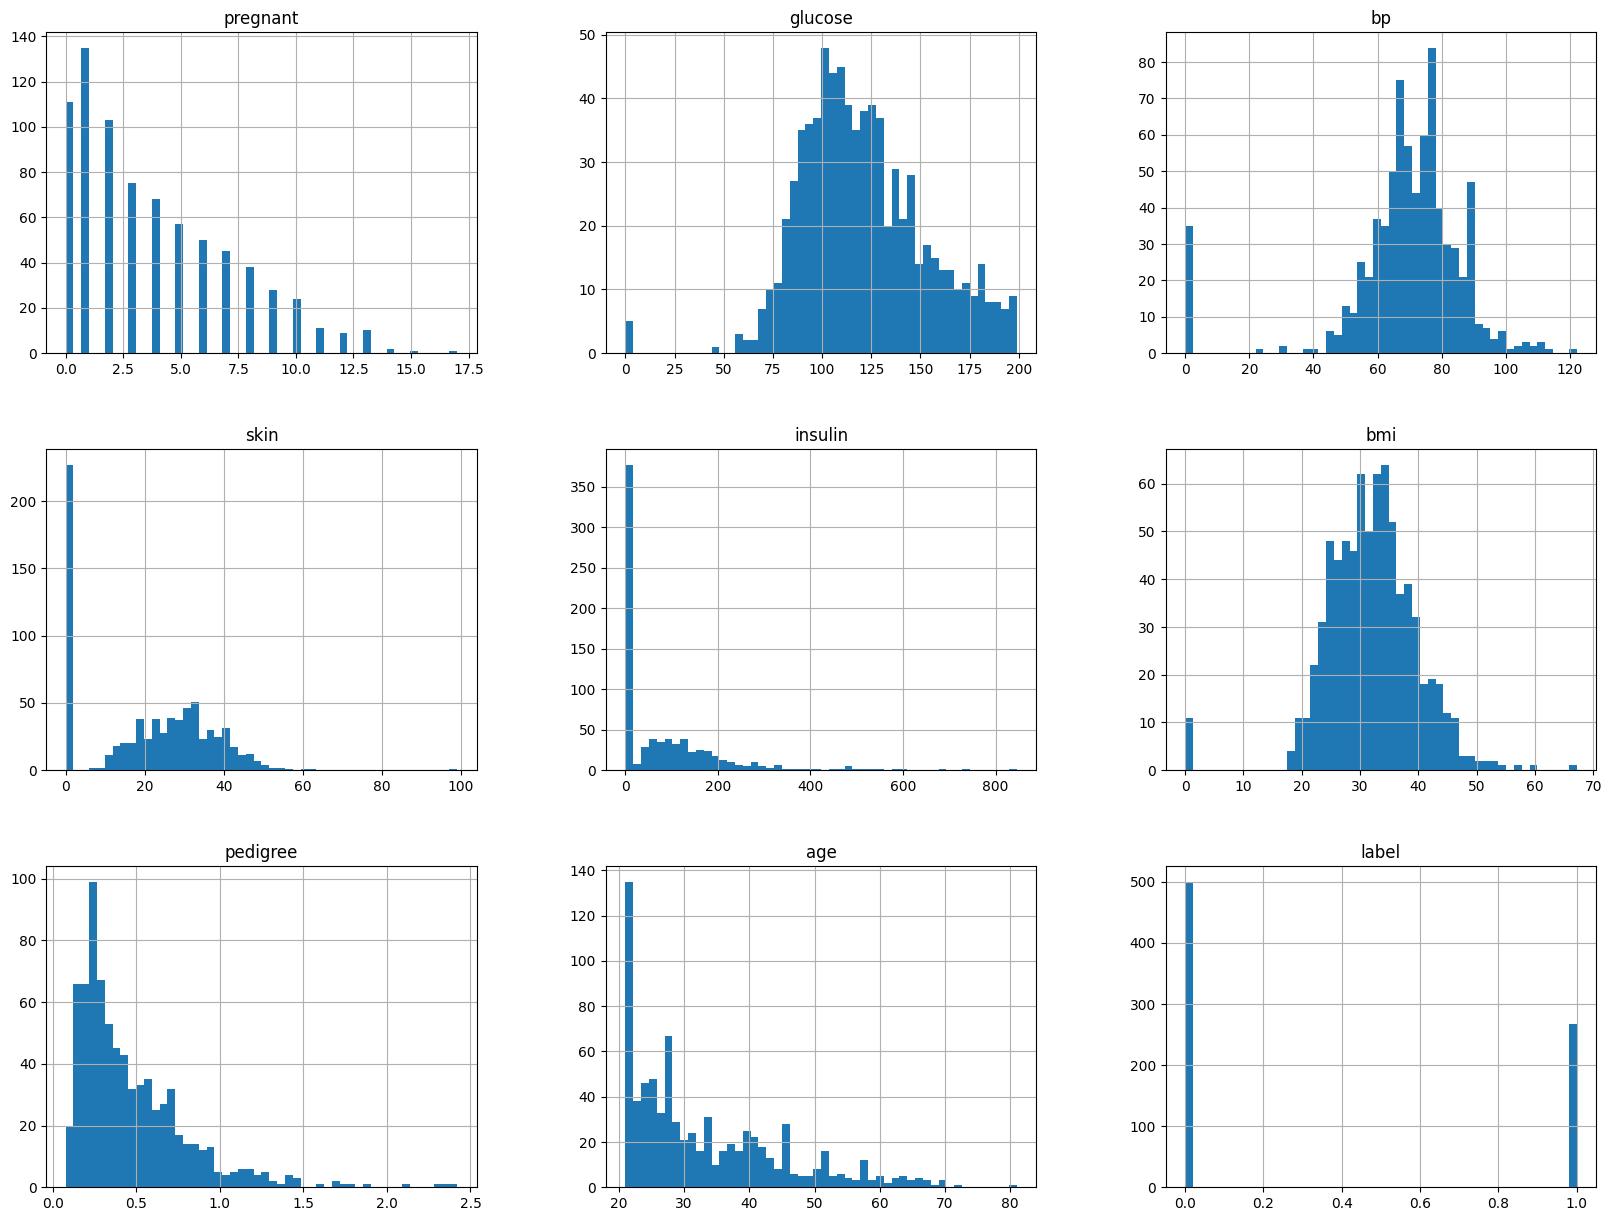

In [ ]:
diabetes_data.hist(bins=50, figsize=(20, 15))
plt.show()

Duplicated data

In [ ]:
duplications = diabetes_data.duplicated()
print("duplicated data\n",duplications[duplications == True])
print("number of duplicated data\n",duplications.sum())


duplicated data
 Series([], dtype: bool)
number of duplicated data
 0


Binary classification


Separation : Features , Labels

In [ ]:
#label
Y = diabetes_data['label']
#features
X = diabetes_data.drop('label', axis=1)

print(X,Y)

     pregnant  glucose    bp  skin  insulin   bmi  pedigree   age
1         6.0    148.0  72.0  35.0      0.0  33.6     0.627  50.0
2         1.0     85.0  66.0  29.0      0.0  26.6     0.351  31.0
3         8.0    183.0  64.0   0.0      0.0  23.3     0.672  32.0
4         1.0     89.0  66.0  23.0     94.0  28.1     0.167  21.0
5         0.0    137.0  40.0  35.0    168.0  43.1     2.288  33.0
..        ...      ...   ...   ...      ...   ...       ...   ...
764      10.0    101.0  76.0  48.0    180.0  32.9     0.171  63.0
765       2.0    122.0  70.0  27.0      0.0  36.8     0.340  27.0
766       5.0    121.0  72.0  23.0    112.0  26.2     0.245  30.0
767       1.0    126.0  60.0   0.0      0.0  30.1     0.349  47.0
768       1.0     93.0  70.0  31.0      0.0  30.4     0.315  23.0

[768 rows x 8 columns] 1      1.0
2      0.0
3      1.0
4      0.0
5      1.0
      ... 
764    0.0
765    0.0
766    0.0
767    1.0
768    0.0
Name: label, Length: 768, dtype: float64


Model construction

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 40% des données pour le test


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)

[0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]


Model evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("accuracy\n",accuracy)
#  confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix\n",conf_matrix)

accuracy
 0.683982683982684
Confusion Matrix
 [[114  32]
 [ 41  44]]
